# The PositionInterpolator

Here we cover the detail of the **PositionInterpolator**. This tool allows you to gather lots of information about what is occurring during an orbit or trigger.

## The Constructor
The constructor is build a **PositionInterpolator** from both a Trigdat file and a daily position history file. 

In [1]:
from gbmgeometry import PositionInterpolator
from gbmgeometry.utils.package_utils import get_path_of_data_file

trigdat_file = get_path_of_data_file('glg_trigdat_all_bn080916009_v02.fit')

pi = PositionInterpolator.from_trigdat(trigdat_file)

posthist_file = get_path_of_data_file('glg_poshist_all_151013_v00.fit')

pi = PositionInterpolator.from_poshist(posthist_file)

You can even build them from HdF5 file versions of the normal fits files. What? Yes we provide a converter for that as the HDF5 is much smaller and faster to load

In [2]:
from gbmgeometry import convert_poshist2hdf5, convert_trigdat2hdf5

convert_poshist2hdf5(posthist_file, 'my_posthist.h5')

convert_trigdat2hdf5(trigdat_file, 'my_trigdat.h5')

and to load them

In [3]:

trigdat_file = get_path_of_data_file('trigdat.h5')

pi = PositionInterpolator.from_trigdat_hdf5(trigdat_file)

posthist_file = get_path_of_data_file('posthist.h5')

pi = PositionInterpolator.from_poshist_hdf5(posthist_file)

## Plotting
We can do some really fun 3D plotting and animation. This is best enjoyed live by [clicking this link](https://mybinder.org/v2/gh/grburgess/gbmgeometry/b206f8a2eaa6ff32259cde006ce863362f073c91).
## Basic functions

We can check to see if Fermi is active at any time. For example, it is shut off during SAA passage.

In [4]:

tmin, tmax = pi.minmax_time()

pi.is_fermi_active(tmin)

True

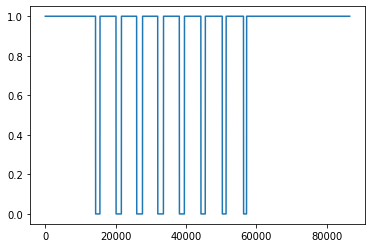

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, ax = plt.subplots()

time = np.linspace(tmin, tmax, 5000)

ax.plot(time-tmin,pi.is_fermi_active(time) )